# Lecture 1: Problem 1  Prove your dog or cat is a dog or cat

## by DougS

### Purpose

The goal of this notebook is to load the model from the first lecture and then prove my dog is in fact a dog.

### Lock and Load

Import the needed libraries.

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Load the data

In [6]:
# Where the images live.
PATH = "data/dogscats/"
# Specific info needed by the functions.
arch=resnet34
sz=224

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 9)


HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[ 0.       0.0487   0.02682  0.98926]                         
[ 1.       0.04431  0.02534  0.98975]                         
[ 2.       0.0335   0.02507  0.99072]                         
[ 3.       0.03871  0.02644  0.98975]                         
[ 4.       0.0387   0.02528  0.98975]                         
[ 5.       0.02782  0.02434  0.99072]                         
[ 6.       0.0269   0.02624  0.98926]                         
[ 7.       0.03477  0.02333  0.99072]                         
[ 8.       0.0305   0.02262  0.9917 ]                         



In [5]:
learn.save('224_lastlayer')
learn.load('224_lastlayer')

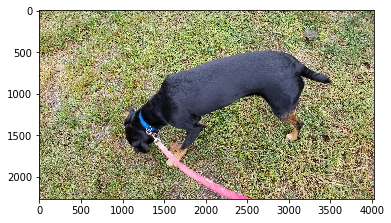

In [6]:
img = plt.imread(f'{PATH}/callie.jpg')
plt.imshow(img);

I needed to read the [forums.fast.ai over and over again|http://forums.fast.ai/t/predicting-on-single-image-using-fastai-model/7869] before I got it.

In [17]:
# These transform the image to a standard used by the model.
trn_tfms, val_tfms = tfms_from_model(resnet34,sz)

In [18]:
callie_transformed = val_tfms(open_image(f'{PATH}/callie.jpg'))

In [21]:
print("Raw image shape: ", img.shape)
print("transformed shape: ", callie_transformed.shape)

Raw image shape:  (2268, 4032, 3)
transformed shape:  (3, 224, 224)


In [25]:
learn.precompute = False

In [26]:
preds = learn.predict_array(callie_transformed[None])
np.argmax(preds) # preds are log probabilities of classes

1

1 = dog, good.